In [1]:
# Importing libraries

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Use a function to calculate position as a function of time
def position(pos, vel, t):
    return pos + vel*t

In [31]:
x0_1 = 5 # Initial position of the first ball
x0_2 = -5 # Initial position of the second ball
x0 = [x0_1, x0_2] # Initial positions before collision

In [35]:
v0_1 = 1 # Initial velocity of the first ball (at rest)
v0_2 = 2 # Initial velocity of the second ball
v0 = np.array([v0_1,v0_2]) # Array of initial velocities before collision

In [36]:
# Masses of the two balls
m1 = 3
m2 = 3

msum = m1 + m2
mdiff = m1 - m2

mmatrix = np.array([[mdiff/msum, 2*m2/msum], [2*m1/msum, -mdiff/msum]]) # Mass matrix
print(mmatrix)

[[0. 1.]
 [1. 0.]]


In [37]:
v = np.dot(mmatrix,v0)
print('Velocity of the first ball after collision: ', v[0])
print('Velocity of the second ball after collision: ', v[1])

Velocity of the first ball after collision:  2.0
Velocity of the second ball after collision:  1.0


In [38]:
# Collision Time
ctime = (x0[0] - x0[1])/(v0[1] - v0[0])
print('Collision Time: ', round(ctime, 2),'s')

Collision Time:  10.0 s


In [39]:
# Collsion Position
cpos = position(x0, v0, ctime)
print(cpos)

[15. 15.]


In [42]:
# Tracking Trajectory
steps = 100

time = np.linspace(0, 2*ctime, steps)

pos1 = []
pos2 = []

for t in time:
    if t < ctime:
        pos1_t = position(x0_1,v0_1,t)
        pos2_t = position(x0_2,v0_2,t)
    else:
        pos1_t = position(cpos[0], v[0], t - ctime)
        pos2_t = position(cpos[1], v[1], t - ctime)
    pos1.append(pos1_t)
    pos2.append(pos2_t)

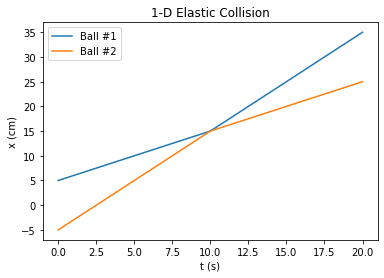

In [43]:
# Plotting
plt.plot(time, pos1)
plt.plot(time, pos2)
plt.title('1-D Elastic Collision')
plt.xlabel('t (s)')
plt.ylabel('x (cm)')
plt.legend(['Ball #1','Ball #2'])